# Data Loading

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_excel('data.xlsx')

## Primary Level Analysis

In [31]:
data.describe()

,id,likes
count,300000.000000,300000.000000
mean,150000.500000,773.364793
std,86602.684716,4931.463419
min,1.000000,0.000000
25%,75000.750000,3.000000
50%,150000.500000,76.000000
75%,225000.250000,364.000000
max,300000.000000,560193.000000


In [32]:
data[50:60]

,id,date,likes,content,username,media,inferred company
50,51,2020-03-22 02:49:52,704,The number of people with the coronavirus dise...,cnnphilippines,[Photo(previewUrl='https://pbs.twimg.com/media...,cnn
51,52,2018-02-19 16:00:01,133,Freedom | Family | Hope | Reward\nA 💪 foundati...,AmwayUS,[Photo(previewUrl='https://pbs.twimg.com/media...,amway
52,53,2019-04-07 13:59:48,1,The Let's Dine In Gift Card Promo is on! Valid...,ShopRiteStores,[Photo(previewUrl='https://pbs.twimg.com/media...,shoprite
53,54,2020-11-03 07:14:02,48,Key moments from Trump's final day of campaign...,Independent,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,independent
54,55,2018-01-16 15:22:45,1308,The Bulls are going a little stir crazy... 😂 #...,redbullracing,[Photo(previewUrl='https://pbs.twimg.com/media...,oracle
55,56,2019-02-18 12:30:00,36,"Driven, Hard Working...Obsessed? You've got to...",EuroLeague,[Video(thumbnailUrl='https://pbs.twimg.com/med...,turkish airlines
56,57,2020-06-17 13:12:04,103,"⛽ 🍫 From fuel, drinks and snacks\n🍎 💧 To fruit...",Shell,[Photo(previewUrl='https://pbs.twimg.com/media...,shell
57,58,2019-01-10 13:04:38,22,The TOP 10 BLOCKS of the season SO FAR!\n\nDon...,EuroLeague,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,turkish airlines
58,59,2020-12-21 16:37:01,0,Missed #ConnectCanada?! We have you covered. C...,CiscoCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cisco
59,60,2019-11-08 09:07:36,421,I don’t think that I will ever stop being grat...,poornabell,[Photo(previewUrl='https://pbs.twimg.com/media...,bell


In [33]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Verify the conversion
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                300000 non-null  int64         
 1   date              300000 non-null  datetime64[ns]
 2   likes             300000 non-null  int64         
 3   content           300000 non-null  object        
 4   username          300000 non-null  object        
 5   media             300000 non-null  object        
 6   inferred company  300000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 16.0+ MB
None


In [34]:
# Use regex to check for the presence of media types and create boolean columns
data['has_image'] = data['media'].str.contains(r'\[Photo\(', case=False, na=False)
data['has_video'] = data['media'].str.contains(r'\[Video\(', case=False, na=False)
data['has_gif'] = data['media'].str.contains(r'\[Gif\(', case=False, na=False)

# Text Pre-Processing

In [35]:
import pandas as pd
import re


# Function to clean text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove punctuation and numbers, keep only letters, number and spaces
    return text

# Apply the cleaning function to the 'content' column
data['clean_content'] = data['content'].apply(lambda x: clean_text(x))


# Exploratory Data Analysis

## Like count frequency distribution

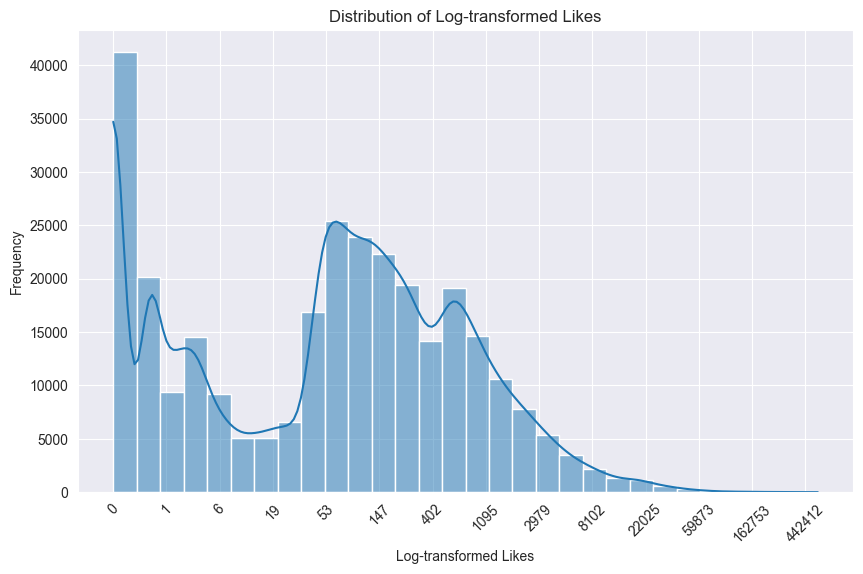

In [36]:
import numpy as np

plt.figure(figsize=(10, 6))

# Since log(0) is undefined, add 1 to each value to handle tweets with 0 likes
likes_log = np.log1p(data['likes'])

sns.histplot(likes_log, bins=30, kde=True)
plt.title('Distribution of Log-transformed Likes')
plt.xlabel('Log-transformed Likes')
plt.ylabel('Frequency')

# Optionally, adjust the x-ticks to show the original likes values
tick_locs = np.arange(min(likes_log), max(likes_log), 1)
tick_lbls = [str(int(np.expm1(x))) for x in tick_locs]  # Convert back to original likes values
plt.xticks(tick_locs, tick_lbls, rotation=45)

plt.show()

## Tweet Length vs Likes

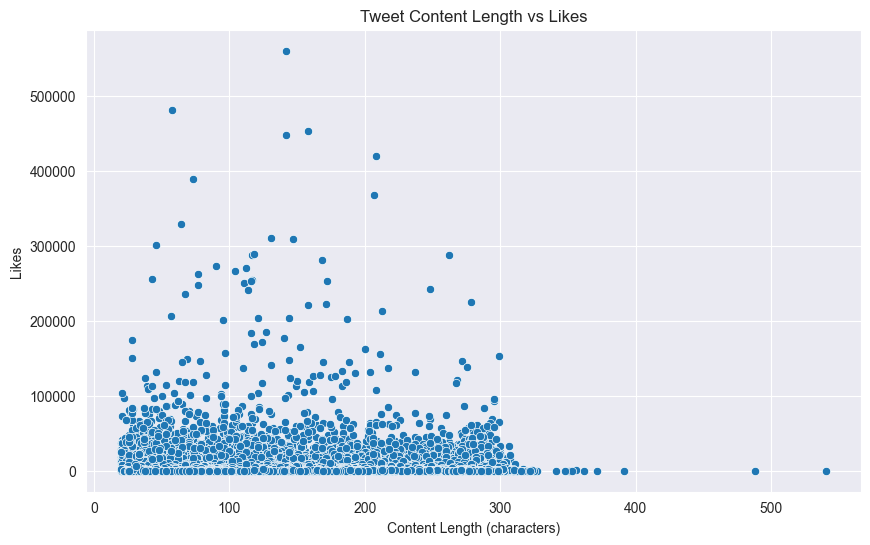

In [37]:
# Calculate the length of each tweet's content
data['content_length'] = data['content'].apply(len)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='content_length', y='likes', data=data)
plt.title('Tweet Content Length vs Likes')
plt.xlabel('Content Length (characters)')
plt.ylabel('Likes')
plt.show()

## Average Likes per Month

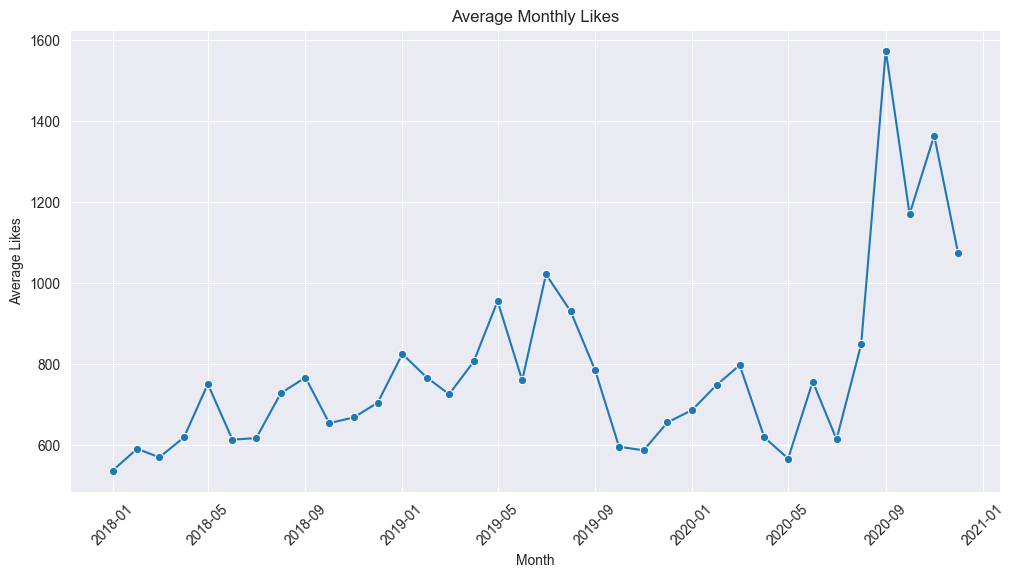

In [38]:
# Ensure 'date' is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract year and month from 'date' for grouping
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

# Group by year and month, then calculate the average likes
monthly_likes = data.groupby(['year', 'month'])['likes'].mean().reset_index()

# To plot, we need a continuous datetime index, so let's combine year and month into a datetime
monthly_likes['datetime'] = pd.to_datetime(monthly_likes[['year', 'month']].assign(DAY=1))

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_likes, x='datetime', y='likes', marker='o')
plt.title('Average Monthly Likes')
plt.xlabel('Month')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)  # Optional: Rotate the x-axis labels for better readability

plt.show()

## Average likes per hour of day

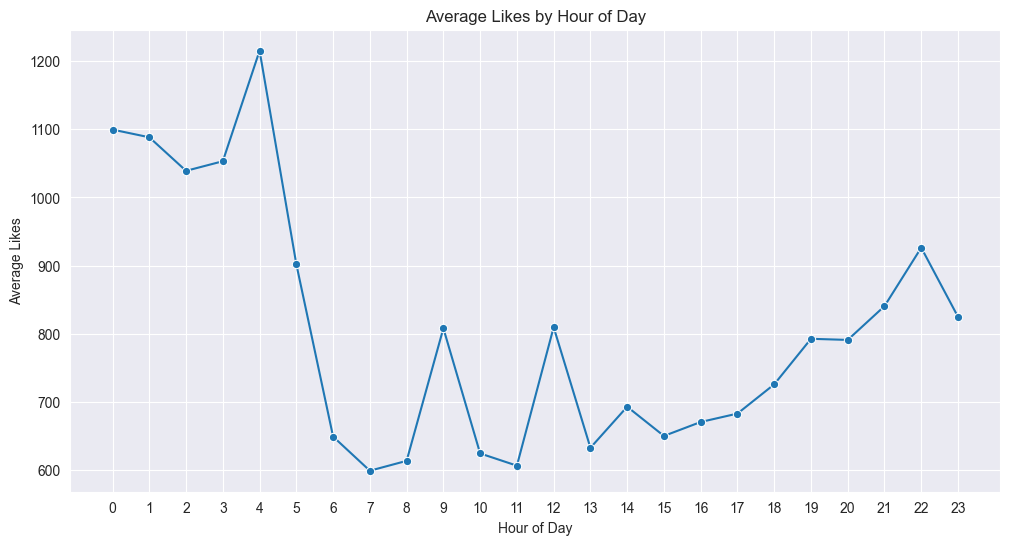

In [39]:
# Check if 'date' is the index or a column and extract the hour accordingly
if 'date' in data.columns:
    # If 'date' is a column
    data['hour_of_day'] = data['date'].dt.hour
else:
    # If 'date' is the index
    data['hour_of_day'] = data.index.hour

# Now, let's calculate the average likes for each hour of the day
average_likes_by_hour = data.groupby('hour_of_day')['likes'].mean().reset_index()

# Plotting the average likes by hour of day
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_likes_by_hour, x='hour_of_day', y='likes', marker='o')
plt.title('Average Likes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Likes')
plt.xticks(range(0, 24))  # Ensure there's a tick for every hour
plt.grid(True)
plt.show()


## Average Likes per day of week

/var/folders/jq/v58_rlfn053ff0sxqx8sw4tw0000gn/T/ipykernel_85505/4272216694.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week_name', y='likes', data=average_likes_by_day, palette='viridis')


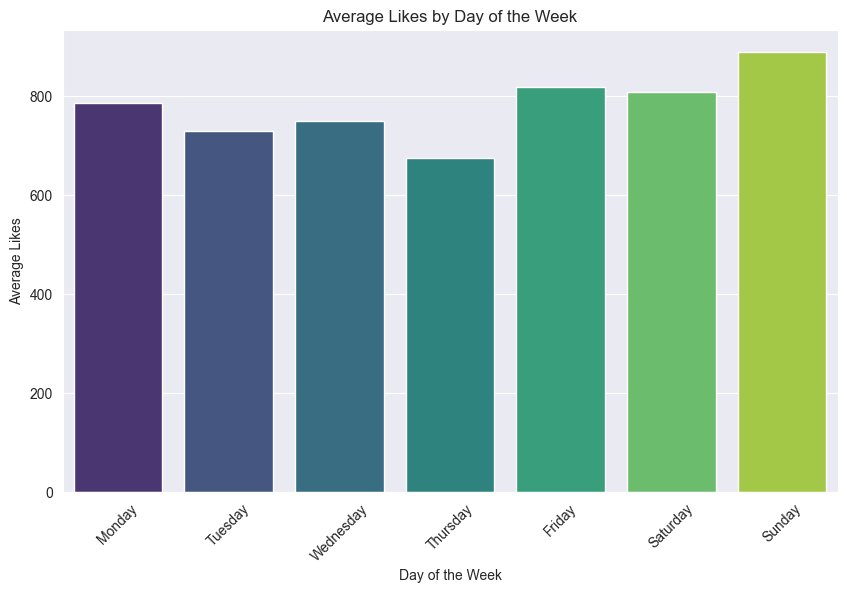

In [40]:
# Ensure 'date' is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract the day of the week from 'date' (Monday=0, Sunday=6)
data['day_of_week'] = data['date'].dt.dayofweek

# Map the day of the week to actual names for better readability
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['day_of_week_name'] = data['day_of_week'].map(day_mapping)

# Group by the day of the week and calculate the average likes
average_likes_by_day = data.groupby('day_of_week_name')['likes'].mean().reindex(day_mapping.values()).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week_name', y='likes', data=average_likes_by_day, palette='viridis')
plt.title('Average Likes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)  # Rotate the day names for better readability
plt.show()

## Sentiment of tweets analysis

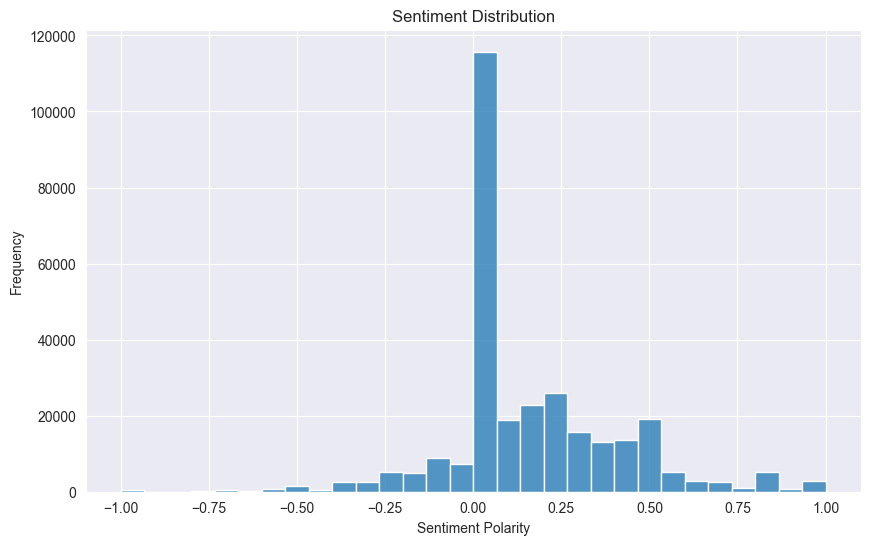

In [41]:
from textblob import TextBlob

# Function to get the polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Applying the function to the clean content
data['sentiment'] = data['clean_content'].apply(get_sentiment)

# Plotting the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, kde=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

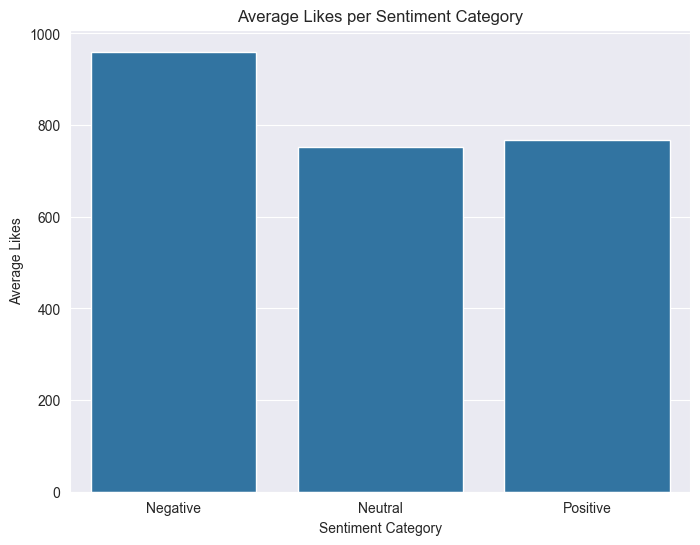

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sentiment' is a column with sentiment scores
# Define sentiment categories based on sentiment score thresholds
def sentiment_category(score):
    if score > 0.1:  # Threshold for positive sentiment
        return 'Positive'
    elif score < -0.1:  # Threshold for negative sentiment
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create a new 'sentiment_category' column
data['sentiment_category'] = data['sentiment'].apply(sentiment_category)

# Group by sentiment category and calculate the average likes
average_likes_by_sentiment = data.groupby('sentiment_category')['likes'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment_category', y='likes', data=average_likes_by_sentiment, order=['Negative', 'Neutral', 'Positive'])
plt.title('Average Likes per Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Likes')
plt.show()

## Highest average liked accounts

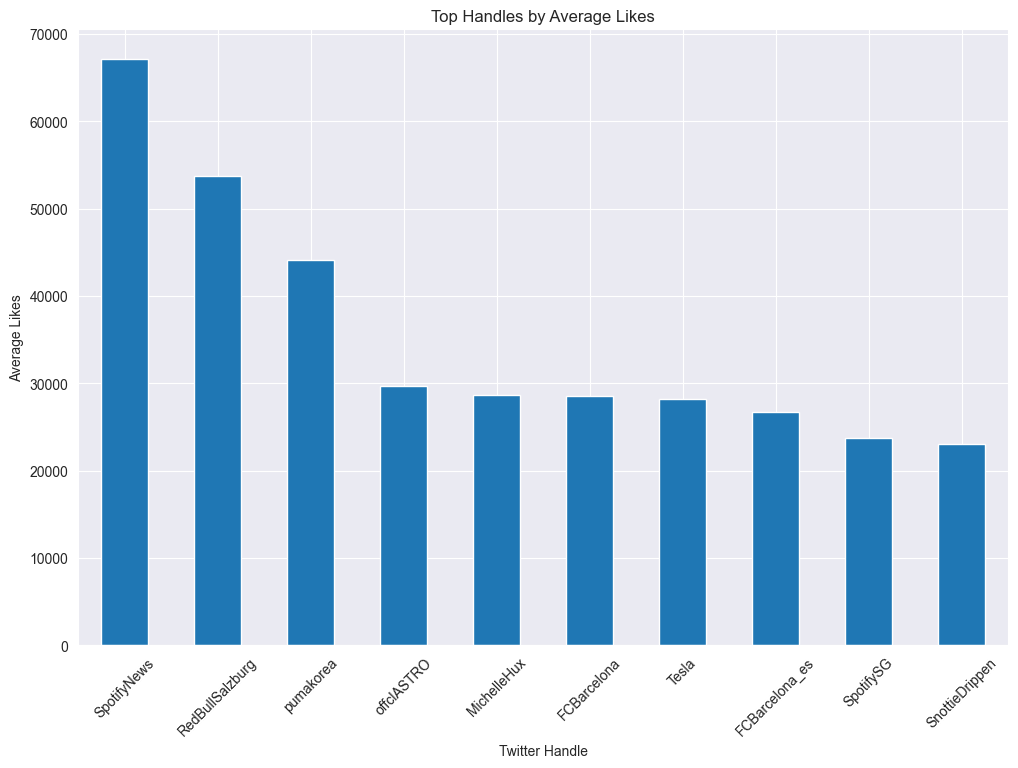

In [43]:
# Group by username and calculate the average likes
top_handles = data.groupby('username')['likes'].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
top_handles.plot(kind='bar')
plt.title('Top Handles by Average Likes')
plt.xlabel('Twitter Handle')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)  # Rotate the usernames for better readability
plt.show()

## Finding Keywords in the most popular Tweets

In [44]:
# Determine the threshold for the top 5% of tweets by likes
like_threshold = data['likes'].quantile(0.95)

# Select the tweets that meet or exceed this threshold
top_liked_tweets = data[data['likes'] >= like_threshold]

In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Function to clean and tokenize tweet content
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and non-alphabetic tokens
    tokens = [token for token in tokens if token.isalpha() and token not in stopwords.words('english')]
    return tokens

# Apply the preprocessing to the top liked tweets
top_liked_tweets['tokens'] = top_liked_tweets['clean_content'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/priyanshsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/priyanshsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/jq/v58_rlfn053ff0sxqx8sw4tw0000gn/T/ipykernel_85505/786208704.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_liked_tweets['tokens'] = top_liked_tweets['clean_content'].apply(preprocess_text)


In [46]:
from collections import Counter

# Aggregate tokens from all top liked tweets into a single list
all_tokens = sum(top_liked_tweets['tokens'].tolist(), [])

# Count the occurrences of each word
word_counts = Counter(all_tokens)

# Identify the most common words
most_common_words = word_counts.most_common(20)  # Adjust the number as needed


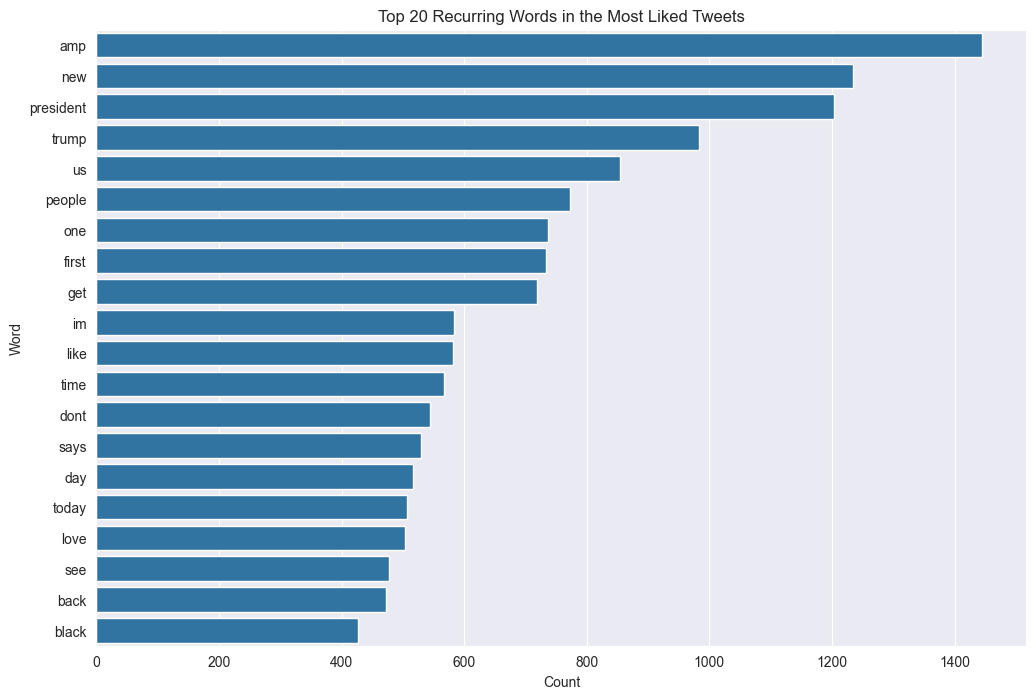

In [47]:
# Convert the most common words to a DataFrame for easy plotting
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=common_words_df)
plt.title('Top 20 Recurring Words in the Most Liked Tweets')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In the graph above the text "amp" refers to the "&" symbol

## Average likes per media type

In [50]:
def get_media_type(row):
    if row['has_image']:
        return 'Image'
    elif row['has_video']:
        return 'Video'
    elif row['has_gif']:
        return 'GIF'
    else:
        return 'None'

# Apply the function to create a new 'media_type' column
data['media_type'] = data.apply(get_media_type, axis=1)

In [51]:
average_likes = data.groupby('media_type')['likes'].mean().reset_index()

/var/folders/jq/v58_rlfn053ff0sxqx8sw4tw0000gn/T/ipykernel_85505/3616637022.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='media_type', y='likes', data=average_likes, palette='coolwarm')


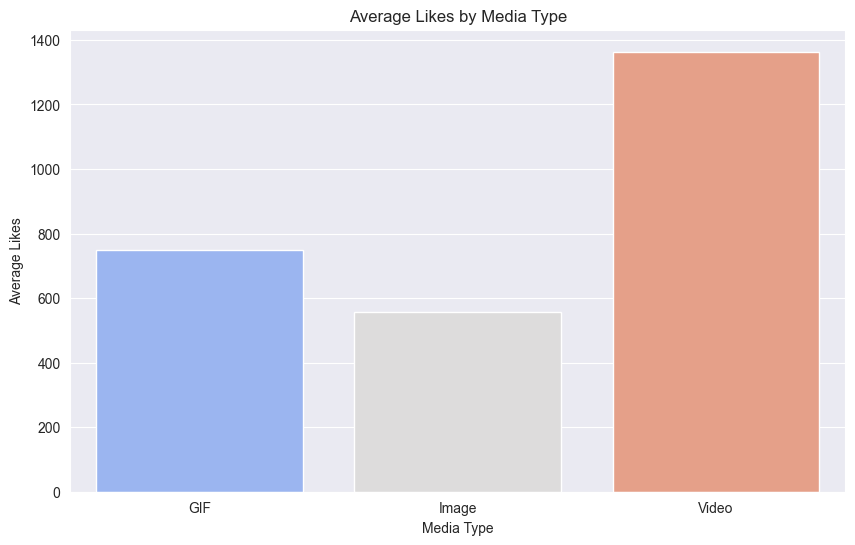

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='media_type', y='likes', data=average_likes, palette='coolwarm')
plt.title('Average Likes by Media Type')
plt.xlabel('Media Type')
plt.ylabel('Average Likes')
plt.show()

In [53]:
data.head()

,id,date,likes,content,username,media,inferred company,has_image,has_video,has_gif,clean_content,content_length,year,month,hour_of_day,day_of_week,day_of_week_name,sentiment,sentiment_category,media_type
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,True,False,False,spend your weekend morning with a ham egg and ...,181,2020,12,0,5,Saturday,0.175,Positive,Image
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,False,False,watch rapper freestyle for over an hour,73,2018,6,10,5,Saturday,0.000,Neutral,Image
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,True,False,False,canadian armenian community demands ban on mil...,104,2020,9,19,1,Tuesday,-0.100,Neutral,Image
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,True,False,False,1st in europe to be devastated by covid19 ital...,140,2020,10,11,3,Thursday,0.500,Positive,Image
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,False,False,congratulations to pauletha butts of she was ...,199,2018,10,14,4,Friday,0.050,Neutral,Image


In [54]:
# Drop the columns
data = data.drop(['has_image', 'has_video', 'has_gif'], axis=1)

In [71]:
data.head()

,id,date,likes,content,username,media,inferred company,clean_content,content_length,year,month,hour_of_day,day_of_week,day_of_week_name,sentiment,sentiment_category,media_type
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,spend your weekend morning with a ham egg and ...,181,2020,12,0,5,Saturday,0.175,Positive,Image
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,watch rapper freestyle for over an hour,73,2018,6,10,5,Saturday,0.000,Neutral,Image
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,canadian armenian community demands ban on mil...,104,2020,9,19,1,Tuesday,-0.100,Neutral,Image
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,1st in europe to be devastated by covid19 ital...,140,2020,10,11,3,Thursday,0.500,Positive,Image
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,congratulations to pauletha butts of she was ...,199,2018,10,14,4,Friday,0.050,Neutral,Image


In [72]:
import pandas as pd
import re

# Function to extract content enclosed in single quotation marks
def extract_single_quoted(text):
    # This regex finds all substrings enclosed in single quotes
    matches = re.findall(r"'([^']*)'", text)
    return matches[0]

data['media'] = data['media'].apply(extract_single_quoted)

In [74]:
data.head()

,id,date,likes,content,username,media,inferred company,clean_content,content_length,year,month,hour_of_day,day_of_week,day_of_week_name,sentiment,sentiment_category,media_type
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?fo...,tim hortons,spend your weekend morning with a ham egg and ...,181,2020,12,0,5,Saturday,0.175,Positive,Image
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?fo...,independent,watch rapper freestyle for over an hour,73,2018,6,10,5,Saturday,0.000,Neutral,Image
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,https://pbs.twimg.com/media/EjG2s4aXgAMNM1o?fo...,cbc,canadian armenian community demands ban on mil...,104,2020,9,19,1,Tuesday,-0.100,Neutral,Image
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,https://pbs.twimg.com/media/EjPaVniX0AAaWLJ?fo...,williams,1st in europe to be devastated by covid19 ital...,140,2020,10,11,3,Thursday,0.500,Positive,Image
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,https://pbs.twimg.com/media/Dp4L0cSUcAAh9JG?fo...,independent,congratulations to pauletha butts of she was ...,199,2018,10,14,4,Friday,0.050,Neutral,Image


In [75]:
# Save DataFrame to a CSV file
data.to_csv('preprocessed_data.csv', index=False)  # Set index=False if you don't want to write row indices to the CSV file